In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import numpy as np
import isoweek  

In [2]:
data_url = "https://scrippsco2.ucsd.edu/assets/data/atmospheric/stations/in_situ_co2/monthly/monthly_in_situ_co2_mlo.csv"
data = "monthly_in_situ_co2_mlo.csv"
# Vérifier si le fichier local existe, et s'il n'existe pas, le télécharger depuis l'URL
import os
import urllib.request

# Vérifier si le fichier local n'existe pas
if not os.path.exists(data):
    # Télécharger les données depuis l'URL et les enregistrer dans le fichier local
    urllib.request.urlretrieve(data_url, data)
    

In [5]:
 # Lire les données depuis le fichier local CSV en sautant la première ligne (commentaire)
raw_data = pd.read_csv(data, skiprows=57)

# Afficher les données brutes
raw_data
 # Sélectionner les lignes contenant au moins une valeur manquante (NaN)
raw_data[raw_data.isnull().any(axis=1)]
 # Supprimer les lignes contenant des valeurs manquantes (NaN) à partir des données brutes
data = raw_data.dropna().copy()

# Afficher les données nettoyées (sans valeurs manquantes) et en créer une copie
data
data = data.dropna(subset=['     CO2'])
print(data.columns)

Index(['  Yr', ' Mn', '    Date', '      Date', '     CO2', 'seasonally',
       '        fit', '  seasonally', '      CO2', ' seasonally', ' Sta'],
      dtype='object')


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]


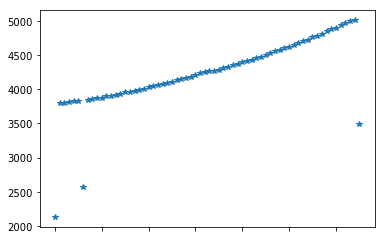

In [6]:
# Grouper par année (Yr) et sommer les valeurs de CO2
annees = data['  Yr'].unique()  # Obtenir la liste des années uniques

# Initialiser les listes pour stocker les années et les émissions de CO2 annuelles
year = []  # Liste des années
yearly_CO2 = []  # Liste des émissions annuelles de CO2

for annee in annees:
    # Filtrer les données pour l'année spécifique
    donnees_annee = data[data['  Yr'] == annee]
    
    # Somme des émissions de CO2 pour l'année spécifique
    donnees_annee['     CO2'] = donnees_annee['     CO2'].astype(float)
    somme_co2_annee = donnees_annee['     CO2'].sum()
    
    # Ajouter l'année et la somme des émissions à leurs listes respectives
    year.append(annee)
    yearly_CO2.append(somme_co2_annee)

# Créer une série pandas avec les données annuelles et les années comme index
yearly_CO2 = pd.Series(data=yearly_CO2, index=year)
# Tracer un graphique de dispersion des données d'incidence annuelle avec un style en étoile
yearly_CO2.plot(style='*')

In [44]:
#Séparez ces deux phénomènes. Caractérisez l'oscillation périodique. Proposez un modèle simple de la contribution lente, estimez ses paramètres et tentez une extrapolation jusqu'à 2025 (dans le but de pouvoir valider le modèle par des observations futures).
import requests
import certifi
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# URL de la page avec les données de CO2
url = "https://scrippsco2.ucsd.edu/data/atmospheric_co2/primary_mlo_co2_record.html"

# Envoyer une requête GET pour récupérer la page web avec vérification SSL
response = requests.get(url, verify=False
# Vérifier que la requête s'est bien déroulée
if response.status_code == 200:
    # Parser le contenu HTML de la page en utilisant html5lib
    soup = BeautifulSoup(response.content, "html5lib")

    # Trouver la table qui contient les données de CO2 (l'élément <table> correspondant)
    table = soup.find("table")

    # Utiliser Pandas pour extraire les données tabulaires
    data = pd.read_html(str(table))[0]

    # Les données contiennent probablement des colonnes de date et de CO2. Vous pouvez les renommer.
    data.columns = ["Date", "CO2"]

    # Convertir la colonne de date en objets datetime
    data["Date"] = pd.to_datetime(data["Date"])

    # Tracer les données
    plt.figure(figsize=(12, 6))
    plt.plot(data["Date"], data["CO2"])
    plt.title("Concentration de CO2 dans l'atmosphère au Mauna Loa Observatory")
    plt.xlabel("Date")
    plt.ylabel("Concentration de CO2 (ppm)")

    # Définition d'une fonction pour le modèle de la contribution lente (par exemple, une fonction linéaire)
    def slow_contrib(x, a, b):
        return a * x + b

    # Ajustement du modèle aux données
    popt, _ = curve_fit(slow_contrib, data.index, data["CO2"])
    a, b = popt

    # Extrapolation jusqu'en 2025
    future_dates = pd.date_range(start=data["Date"].min(), end=pd.to_datetime("2025-01-01"))
    future_indices = np.arange(len(data), len(data) + len(future_dates))
    future_co2 = slow_contrib(future_indices, a, b)

    # Tracer l'extrapolation
    plt.plot(future_dates, future_co2, label="Extrapolation jusqu'en 2025")
    plt.legend()

    # Afficher le graphique
    plt.grid(True)
    plt.show()
else:
    print("La requête a échoué. Code de statut :", response.status_code)

SyntaxError: invalid syntax (<ipython-input-44-e338a2cc7571>, line 16)